# Project: Analyzing No Show Appointments Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have selected dataset 'No Show Appointment'. I have selected this dataset to learn more about Healthcare industry. I would like to analyze patients behavior on why they show up/ do not show up for the appointment.

Business Questions - 
1. Does Gender matter while identifying if the patient will show/ not-show?
2. Is there difference in mean Age of patients who will show up for the appointment as against those patients who will not show up for the appointment?


In [1]:
# Loading Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('noshowappointment.csv')

### Understanding the dataset

In [3]:
df.shape

(110527, 14)

The dataset has 14 variables and 110527 rows.

In [4]:
for i, v in enumerate(df.columns):
    print (i,v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show


Of the 14 variables, first 13 variables are predictor variables and "No-show" is the target variable.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no null values in any variable. Data types are as follows - 

Numeric - PatientId, AppointmentID, Age, Scholarship, Hipertension, Diabetes, Handcap, SMS_received

String - Gender, ScheduledDay, AppointmentDay, Neighbourhood, No-show

In [6]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
df.tail(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Observations - 
1. Age has minimum value as -1 and maximum value of 115. It will be investigated furter and corrected.
2. PatientId and AppointmentID are non-numeric fields. It will be dealt later.

In [9]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

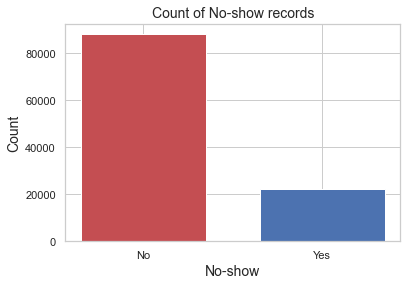

In [10]:
plt.bar([1,1.5], [df['No-show'].value_counts()[0], df['No-show'].value_counts()[1]], tick_label = ['No', 'Yes'], color = ['r', 'b'], width = 0.35)
plt.xlabel('No-show', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Count of No-show records', fontsize = 14);

Of all the records, Count of No-show (No) is 88208 and Count of No-Show (Yes) is 22319

In [11]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

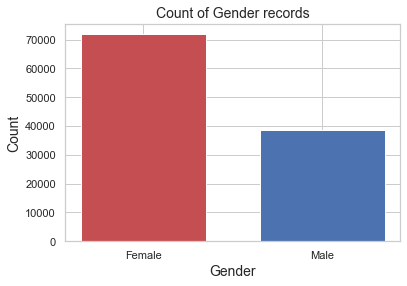

In [12]:
plt.bar([1,1.5], [df['Gender'].value_counts()[0], df['Gender'].value_counts()[1]], tick_label = ['Female', 'Male'], color = ['r', 'b'], width = 0.35)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Count of Gender records', fontsize = 14);

Of all the records, Count of Gender (Female) is 71840 and Count of Gender (Male) is 38687

### Data Cleaning

In [13]:
# Changing datatype of ScheduledDay and AppointmentDay to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [15]:
# Dropping duplicate records
df.drop_duplicates(inplace = True)

In [16]:
df.duplicated().sum()

0

In [17]:
# Renaming the column name
df.rename(columns = {'Hipertension' : 'Hypertension', 'Handcap' : 'Handicap', 'No-show' : 'NoShow'}, inplace = True)

In [18]:
for i, v in enumerate(df.columns):
    print (i,v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hypertension
9 Diabetes
10 Alcoholism
11 Handicap
12 SMS_received
13 NoShow


In [19]:
## Dropping all the rows where Age is less than 0 or more than 100

df.drop(df[(df['Age'] < 0)].index, inplace = True)
df.drop(df[(df['Age'] > 100)].index, inplace = True)

In [20]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105190e+05,1.105190e+05,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000
mean,1.474860e+14,5.675303e+06,37.084519,0.098273,0.197251,0.071870,0.030402,0.022213,0.321040
std,2.560826e+14,7.129600e+04,23.103165,0.297684,0.397925,0.258274,0.171692,0.161441,0.466878
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172598e+13,5.680569e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725522e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [21]:
df.nunique()

PatientId          62294
AppointmentID     110519
Gender                 2
ScheduledDay      103542
AppointmentDay        27
Age                  101
Neighbourhood         81
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMS_received           2
NoShow                 2
dtype: int64

In [22]:
df.shape

(110519, 14)

In [23]:
# Creating new variables for Year, Month, Day, Hour for ScheduledDay, AppointmentDay

df['Year_Scheduled'] = pd.DatetimeIndex(df['ScheduledDay']).year
df['Month_Scheduled'] = pd.DatetimeIndex(df['ScheduledDay']).month
df['Day_Scheduled'] = pd.DatetimeIndex(df['ScheduledDay']).day
df['Hour_Scheduled'] = pd.DatetimeIndex(df['ScheduledDay']).hour
df['Weekday_Scheduled'] = pd.DatetimeIndex(df['ScheduledDay']).weekday

df['Year_Appointment'] = pd.DatetimeIndex(df['AppointmentDay']).year
df['Month_Appointment'] = pd.DatetimeIndex(df['AppointmentDay']).month
df['Day_Appointment'] = pd.DatetimeIndex(df['AppointmentDay']).day

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   PatientId          110519 non-null  float64            
 1   AppointmentID      110519 non-null  int64              
 2   Gender             110519 non-null  object             
 3   ScheduledDay       110519 non-null  datetime64[ns, UTC]
 4   AppointmentDay     110519 non-null  datetime64[ns, UTC]
 5   Age                110519 non-null  int64              
 6   Neighbourhood      110519 non-null  object             
 7   Scholarship        110519 non-null  int64              
 8   Hypertension       110519 non-null  int64              
 9   Diabetes           110519 non-null  int64              
 10  Alcoholism         110519 non-null  int64              
 11  Handicap           110519 non-null  int64              
 12  SMS_received       110519 non-

### Univariate Analysis

In [25]:
for i,v in enumerate(df.columns):
    print(i,v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hypertension
9 Diabetes
10 Alcoholism
11 Handicap
12 SMS_received
13 NoShow
14 Year_Scheduled
15 Month_Scheduled
16 Day_Scheduled
17 Hour_Scheduled
18 Weekday_Scheduled
19 Year_Appointment
20 Month_Appointment
21 Day_Appointment


No     0.79808
Yes    0.20192
Name: NoShow, dtype: float64


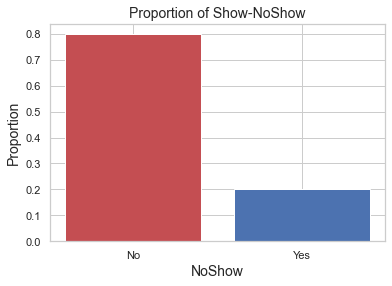

In [26]:
print(df['NoShow'].value_counts(normalize=True))
location = [1,2]
height = [df['NoShow'].value_counts(normalize=True)[0], df['NoShow'].value_counts(normalize=True)[1]]
labels = ['No', 'Yes']
colors = ['r', 'b']

plt.figsize = (12,12)
plt.bar(location, height, tick_label = labels, color = colors)
plt.xlabel('NoShow', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.title('Proportion of Show-NoShow', fontsize = 14);

Almost 80% of the patients have status NoShow:No

F    0.649952
M    0.350048
Name: Gender, dtype: float64


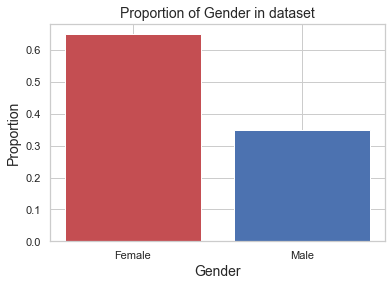

In [27]:
print(df['Gender'].value_counts(normalize=True))
location = [1,2]
height = [df['Gender'].value_counts(normalize=True)[0], df['Gender'].value_counts(normalize=True)[1]]
labels = ['Female', 'Male']
colors = ['r', 'b']

plt.figsize = (12,12)
plt.bar(location, height, tick_label = labels, color = colors)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.title('Proportion of Gender in dataset', fontsize = 14);

Almost 65% of the patients are Female.

0    0.901727
1    0.098273
Name: Scholarship, dtype: float64


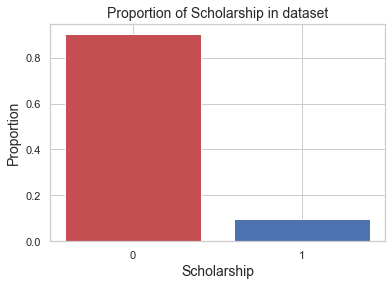

In [28]:
print(df['Scholarship'].value_counts(normalize=True))
location = [1,2]
height = [df['Scholarship'].value_counts(normalize=True)[0], df['Scholarship'].value_counts(normalize=True)[1]]
labels = ['0', '1']
colors = ['r', 'b']

plt.figsize = (12,12)
plt.bar(location, height, tick_label = labels, color = colors)
plt.xlabel('Scholarship', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.title('Proportion of Scholarship in dataset', fontsize = 14);

Almost 90% of the patients are not enrolled in Brasilian welfare program.

0    0.802749
1    0.197251
Name: Hypertension, dtype: float64


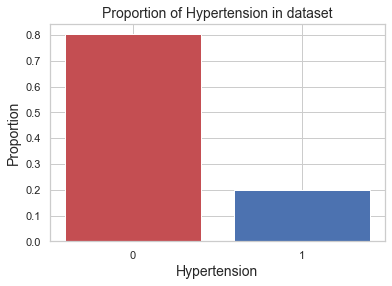

In [29]:
print(df['Hypertension'].value_counts(normalize=True))
location = [1,2]
height = [df['Hypertension'].value_counts(normalize=True)[0], df['Hypertension'].value_counts(normalize=True)[1]]
labels = ['0', '1']
colors = ['r', 'b']

plt.figsize = (12,12)
plt.bar(location, height, tick_label = labels, color = colors)
plt.xlabel('Hypertension', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.title('Proportion of Hypertension in dataset', fontsize = 14);

Around 80% of the patients do not have Hypertension.

0    0.92813
1    0.07187
Name: Diabetes, dtype: float64


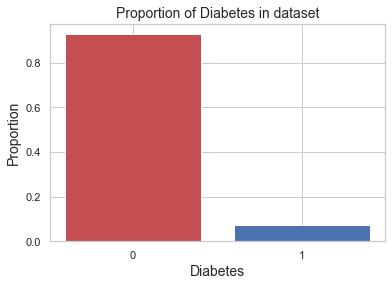

In [30]:
print(df['Diabetes'].value_counts(normalize=True))
location = [1,2]
height = [df['Diabetes'].value_counts(normalize=True)[0], df['Diabetes'].value_counts(normalize=True)[1]]
labels = ['0', '1']
colors = ['r', 'b']

plt.figsize = (12,12)
plt.bar(location, height, tick_label = labels, color = colors)
plt.xlabel('Diabetes', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.title('Proportion of Diabetes in dataset', fontsize = 14);

Around 93% of the patients do not have Diabetes.

0    0.969598
1    0.030402
Name: Alcoholism, dtype: float64


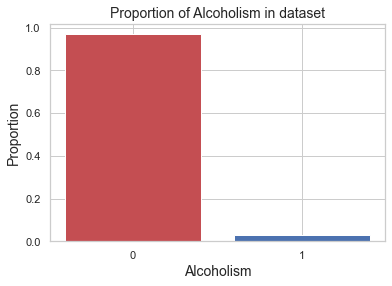

In [31]:
print(df['Alcoholism'].value_counts(normalize=True))
location = [1,2]
height = [df['Alcoholism'].value_counts(normalize=True)[0], df['Alcoholism'].value_counts(normalize=True)[1]]
labels = ['0', '1']
colors = ['r', 'b']

plt.figsize = (12,12)
plt.bar(location, height, tick_label = labels, color = colors)
plt.xlabel('Alcoholism', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.title('Proportion of Alcoholism in dataset', fontsize = 14);

97% of the patients do not have problem of Alcoholism

0    0.67896
1    0.32104
Name: SMS_received, dtype: float64


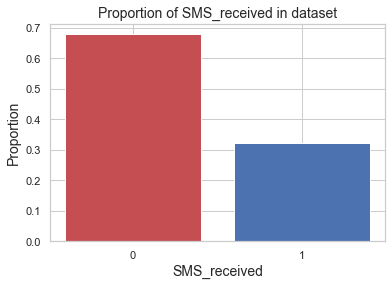

In [32]:
print(df['SMS_received'].value_counts(normalize=True))
location = [1,2]
height = [df['SMS_received'].value_counts(normalize=True)[0], df['SMS_received'].value_counts(normalize=True)[1]]
labels = ['0', '1']
colors = ['r', 'b']

plt.figsize = (12,12)
plt.bar(location, height, tick_label = labels, color = colors)
plt.xlabel('SMS_received', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.title('Proportion of SMS_received in dataset', fontsize = 14);

68% of the patients did not receive SMS

JARDIM CAMBURI                 0.069825
MARIA ORTIZ                    0.052516
RESISTÊNCIA                    0.040093
JARDIM DA PENHA                0.035080
ITARARÉ                        0.031795
                                 ...   
ILHA DO BOI                    0.000317
ILHA DO FRADE                  0.000090
AEROPORTO                      0.000072
ILHAS OCEÂNICAS DE TRINDADE    0.000018
PARQUE INDUSTRIAL              0.000009
Name: Neighbourhood, Length: 81, dtype: float64


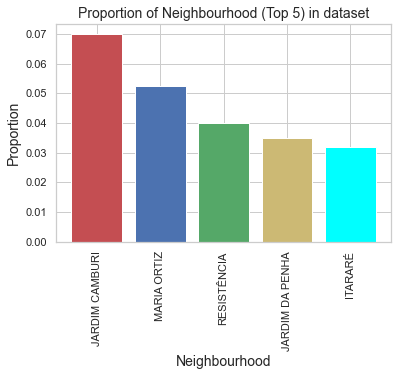

In [33]:
print(df['Neighbourhood'].value_counts(normalize=True))
location = [1,2,3,4,5]
height = [df['Neighbourhood'].value_counts(normalize=True)[0], df['Neighbourhood'].value_counts(normalize=True)[1], df['Neighbourhood'].value_counts(normalize=True)[2], df['Neighbourhood'].value_counts(normalize=True)[3], df['Neighbourhood'].value_counts(normalize=True)[4]]
labels = ['JARDIM CAMBURI', 'MARIA ORTIZ', 'RESISTÊNCIA', 'JARDIM DA PENHA', 'ITARARÉ']
colors = ['r', 'b', 'g', 'y', 'cyan']

plt.figsize = (12,12)
plt.bar(location, height, tick_label = labels, color = colors)
plt.xlabel('Neighbourhood', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.xticks(rotation=90)
plt.title('Proportion of Neighbourhood (Top 5) in dataset', fontsize = 14);

Top 5 neighbourhods where hospital were located are above.

0    0.979759
1    0.018440
2    0.001656
3    0.000118
4    0.000027
Name: Handicap, dtype: float64


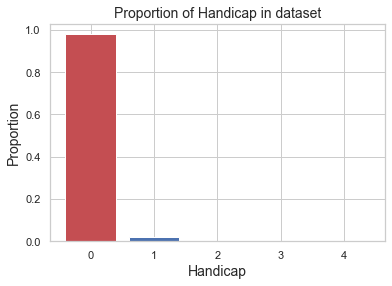

In [34]:
print(df['Handicap'].value_counts(normalize=True))
location = [1,2,3,4,5]
height = [df['Handicap'].value_counts(normalize=True)[0], df['Handicap'].value_counts(normalize=True)[1], df['Handicap'].value_counts(normalize=True)[2], df['Handicap'].value_counts(normalize=True)[3], df['Handicap'].value_counts(normalize=True)[4]]
labels = ['0', '1', '2', '3', '4']
colors = ['r', 'b', 'g', 'y', 'cyan']

plt.figsize = (12,12)
plt.bar(location, height, tick_label = labels, color = colors)
plt.xlabel('Handicap', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.title('Proportion of Handicap in dataset', fontsize = 14);

98% of the patients are not handicap

In [35]:
cols = ['PatientId', 'AppointmentID']
df.drop(cols, axis =1, inplace=True)

In [36]:
df.nunique()

Gender                    2
ScheduledDay         103542
AppointmentDay           27
Age                     101
Neighbourhood            81
Scholarship               2
Hypertension              2
Diabetes                  2
Alcoholism                2
Handicap                  5
SMS_received              2
NoShow                    2
Year_Scheduled            2
Month_Scheduled           8
Day_Scheduled            31
Hour_Scheduled           16
Weekday_Scheduled         6
Year_Appointment          1
Month_Appointment         3
Day_Appointment          24
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### Q1. Is there difference in Age of patients who show up vs patients who do not show up?
### Q2. Does Gender affects the status 'Show up/ Not Show up' status?
### Q3. Is Scholarship helping people to show up at the appointment?
### Q4. Is SMS reminder helping the patient to show up at the appointment?
### Q5. On which day of the week, are the appointments high and show up high too?
### Q6. Is there any disease (Diabetes, Hypertension, Handicap, etc.) that leads to higher show ups?

#### Age

NoShow
No     38
Yes    33
Name: Age, dtype: int64


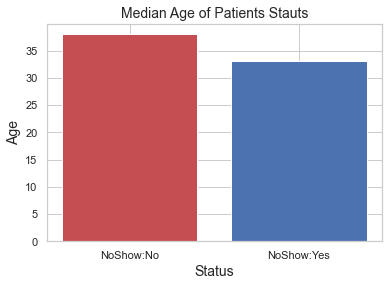

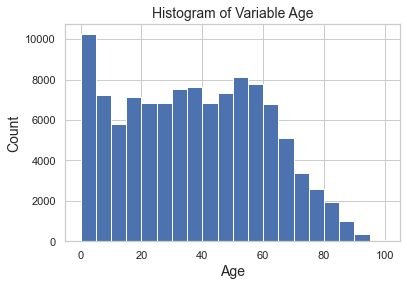

In [37]:
a = df.groupby('NoShow')['Age'].median()
print(a)
location = [1,2]
height = [a[0], a[1]]

labels = ['NoShow:No', 'NoShow:Yes']
colors = ['r', 'b']

plt.figsize = (12,12)
plt.bar(location, height, tick_label = labels, color = colors)
plt.xlabel('Status', fontsize = 14)
plt.ylabel('Age', fontsize = 14)
plt.title('Median Age of Patients Stauts', fontsize = 14);
plt.show()
df['Age'].hist(bins = 20);
plt.title('Histogram of Variable Age', fontsize = 14)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

Observations - 
1. Most of the patients are aged less than 60 years.
2. Since, the distribution is right skewed, Median is a better central tendency
3. Median Age of Patients with Status:NoShow (No) is higher than Status:NoShow (Yes)

#### Gender

NoShow  Gender
No      F         57241
        M         30962
Yes     F         14591
        M          7725
Name: Gender, dtype: int64


NoShow  Gender
No      F         0.648969
        M         0.351031
Yes     F         0.653836
        M         0.346164
Name: Gender, dtype: float64


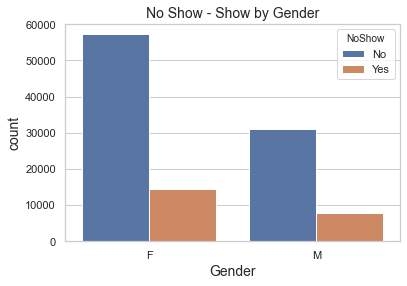

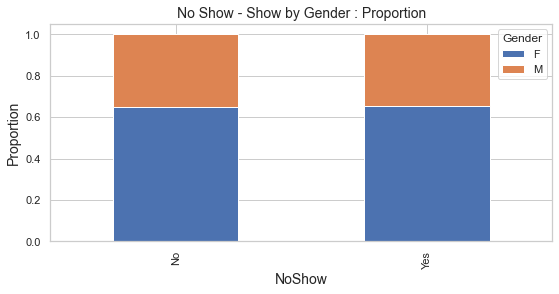

In [38]:
a = df.groupby('NoShow')['Gender'].value_counts()
b = df.groupby('NoShow')['Gender'].value_counts(normalize = True)

print(a)
print('\n')
print(b)

sns.countplot(x = 'Gender', data = df, hue = 'NoShow')
plt.title('No Show - Show by Gender', fontsize = 14)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('count', fontsize = 14);

fig, ax = plt.subplots()
c = pd.crosstab(df['NoShow'],df['Gender'])
c.div(c.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(9,4),  ax = ax)
plt.title('No Show - Show by Gender : Proportion', fontsize = 14)
plt.xlabel('NoShow', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14);

 Observations - 
1. Number of Females are more than Males in the dataset.
2. Around 65% of the Female in both the category do not show up.

#### Scholarship

Scholarship  NoShow
0            No        0.801943
             Yes       0.198057
1            No        0.762637
             Yes       0.237363
Name: NoShow, dtype: float64


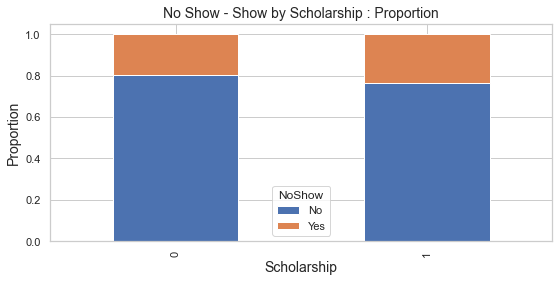

In [39]:
a = df.groupby('Scholarship')['NoShow'].value_counts(normalize = True)
print(a)
fig, ax = plt.subplots()
c = pd.crosstab(df['Scholarship'],df['NoShow'])
c.div(c.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(9,4),  ax = ax)
plt.title('No Show - Show by Scholarship : Proportion', fontsize = 14)
plt.xlabel('Scholarship', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14);

Patients with Scholarship have higher NoShow:Yes status proportion than patients with no scholarship.

#### Hypertension

Hypertension  NoShow
0             No        0.790981
              Yes       0.209019
1             No        0.826972
              Yes       0.173028
Name: NoShow, dtype: float64


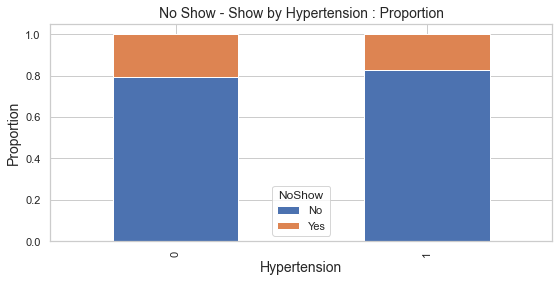

In [40]:
a = df.groupby('Hypertension')['NoShow'].value_counts(normalize = True)
print(a)
fig, ax = plt.subplots()
c = pd.crosstab(df['Hypertension'],df['NoShow'])
c.div(c.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(9,4),  ax = ax)
plt.title('No Show - Show by Hypertension : Proportion', fontsize = 14)
plt.xlabel('Hypertension', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14);

Patients with Hypertension have lower NoShow:Yes status proportion than patients with no hypertension.

#### Diabetes

Diabetes  NoShow
0         No        0.796385
          Yes       0.203615
1         No        0.819967
          Yes       0.180033
Name: NoShow, dtype: float64


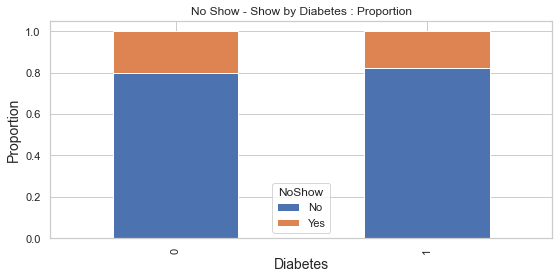

In [41]:
a = df.groupby('Diabetes')['NoShow'].value_counts(normalize = True)
print(a)
fig, ax = plt.subplots()
c = pd.crosstab(df['Diabetes'],df['NoShow'])
c.div(c.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(9,4),  ax = ax)
plt.title('No Show - Show by Diabetes : Proportion')
plt.xlabel('Diabetes', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14);

Patients with Diabetes have lower NoShow:Yes status proportion than patients with no Diabetes.

#### Alcoholism

Alcoholism  NoShow
0           No        0.798066
            Yes       0.201934
1           No        0.798512
            Yes       0.201488
Name: NoShow, dtype: float64


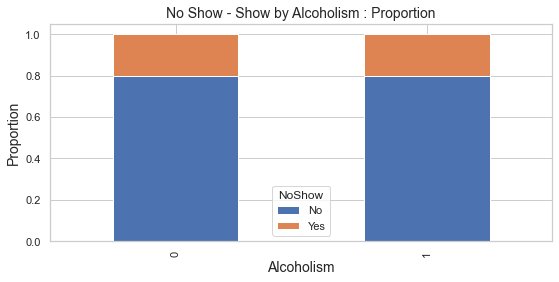

In [42]:
a = df.groupby('Alcoholism')['NoShow'].value_counts(normalize = True)
print(a)
fig, ax = plt.subplots()
c = pd.crosstab(df['Alcoholism'],df['NoShow'])
c.div(c.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(9,4),  ax = ax)
plt.title('No Show - Show by Alcoholism : Proportion', fontsize = 14)
plt.xlabel('Alcoholism', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14);

There is no difference between in patients with Alcoholism with NoShow:Yes status and NoShow: No status.

#### Handicap

Handicap  NoShow
0         No        0.797639
          Yes       0.202361
1         No        0.821884
          Yes       0.178116
2         No        0.797814
          Yes       0.202186
3         No        0.769231
          Yes       0.230769
4         No        0.666667
          Yes       0.333333
Name: NoShow, dtype: float64


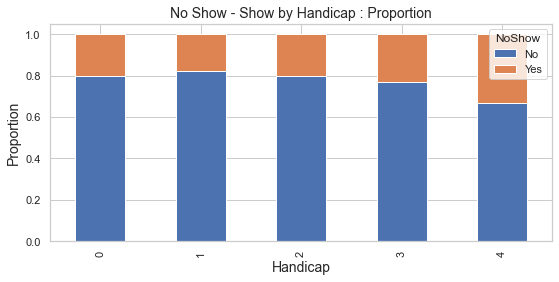

In [43]:
a = df.groupby('Handicap')['NoShow'].value_counts(normalize = True)
print(a)
fig, ax = plt.subplots()
c = pd.crosstab(df['Handicap'],df['NoShow'])
c.div(c.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(9,4),  ax = ax)
plt.title('No Show - Show by Handicap : Proportion', fontsize = 14)
plt.xlabel('Handicap', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14);

Patient with Handicap level 4 have higher proprotion of patients with status NoShow:Yes as compared to other Handicap levels.

#### SMS_received

SMS_received  NoShow
0             No        0.832991
              Yes       0.167009
1             No        0.724247
              Yes       0.275753
Name: NoShow, dtype: float64


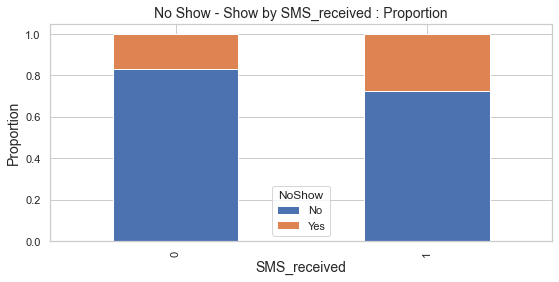

In [44]:
a = df.groupby('SMS_received')['NoShow'].value_counts(normalize = True)
print(a)
fig, ax = plt.subplots()
c = pd.crosstab(df['SMS_received'],df['NoShow'])
c.div(c.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(9,4),  ax = ax)
plt.title('No Show - Show by SMS_received : Proportion', fontsize = 14)
plt.xlabel('SMS_received', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14);

Patients who received SMS have higher NoShow:Yes status proportion than patients with did not receive SMS.

#### Weekday_Scheduled

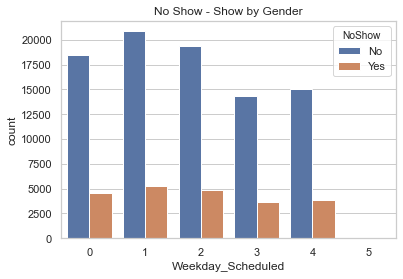

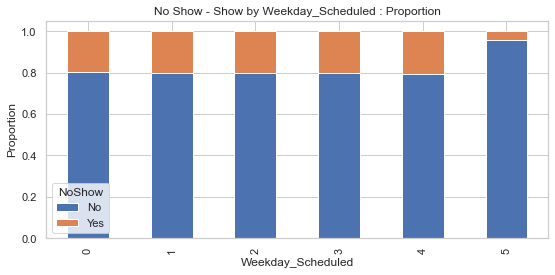

In [45]:
sns.countplot(x = 'Weekday_Scheduled', data = df, hue = 'NoShow')
plt.title('No Show - Show by Gender');

fig, ax = plt.subplots()
c = pd.crosstab(df['Weekday_Scheduled'],df['NoShow'])
c.div(c.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(9,4),  ax = ax)
plt.title('No Show - Show by Weekday_Scheduled : Proportion')
plt.xlabel('Weekday_Scheduled')
plt.ylabel('Proportion');

Here 0 is Monday, 1 is Tuesday, 2 is Wednesday, 3 is Thursday, 4 is Friday, 5 is Saturday

Patients who scheduled on Weekend have lower proportion of patients with status NoShow:Yes

## Limitations

1. If we know the actual patient population from a particular neighborhood, then we can get a reason on why majority of the patients are coming from Jardim Camburi.

2. The data contained only April, May and June data - If there are complete full year data on monthly basis, we can actually identify the traffic months for physicians appointments

3. If we had the data on how many SMS are sent to patient, we can actually find out that how many SMS reminders are required for a patient to get active for appointment.

4. If we would have got the disease severity of each patient, we can try and answer on why certain age group patients are having more visits compared to other age groups.

<a id='conclusions'></a>
## Conclusions

Q1. Is there difference in Age of patients who show up vs patients who do not show up?
A1. Yes, median age of patients with instance 'NoShow: Yes' is lower than 'NoShow: No'.

Q2. Does Gender affects the status 'Show up/ Not Show up' status?
A2. There is not much of a difference with Gender in identifying if the patient will show up or not.

Q3. Is Scholarship helping people to show up at the appointment?
A3. Patients who received scholarship showed up at the apoointment than patients without scholarship.

Q4. Is SMS reminder helping the patient to show up at the appointment?
A4. Patients showed up on appointment more often when they received SMS reminder.

Q5. On which day of the week, are the appointments high?
A5. Majority of the appointments are on Monday, Tuesday, and Wednesday.

Q6. Is there any disease (Diabetes, Hypertension, Handicap, etc.) that leads to higher show ups?
A6. Hypertension and Diabetes patients are attending the doctor with NoShow status = "No" are from the similar age ranges from 40 to 80 - with females conversion better than Males. Male and Female visits for Handicap patient are in the similar range (There is not much of difference). Alcoholism patients from Male group visits are more compared to female and they are in range from 45 to 65.

## References - N/A